In [1]:
import numpy as np
import pandas as pd
import re
import os
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import glob

In [2]:
def preprocessing(filename):
    """Read a file and preprocessing ,return a token list"""
    content = read_file(filename)
    token_list = tokenization(content)
    token_list = remove_stop_word(token_list)
    token_list = sorted(token_list)
    return token_list

def read_file(filename):
    """Read the file of dictionary and return a string"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'r', encoding='UTF-8')
    content = f_value.read()
    f_value.close()
    return content


def addJiebaWordDic(filename):
    """Read jieba word dict from file"""
    # read jieba word dict from file
    jiebaWordDict = read_file(filename)
    # split by \n
    jiebaWordDict = jiebaWordDict.split("\n")
    # remove empty item
    jiebaWordDict = list(filter(None, jiebaWordDict))
    # add word dict
    for word in jiebaWordDict:
        jieba.add_word(word, freq=None, tag=None)

def tokenization(content):
    """Tokenization"""
    #remove \t\n\r\f\v
    content = re.sub('[\t\n\r\f\v]', '', content)
    #remove " "
    content = re.sub(' ', '', content)
    #remove "　"
    content = re.sub('　', '', content)
    #remove [a-zA-Z]
    content = re.sub('[a-zA-z]', '', content)
    #remove [0-9]
    content = re.sub('[0-9]', '', content)
    #remove punctuation marks -> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    puncs = '，、：。～「」；？！「」『』—（）…－“–”〃〜─ㄧ＂︰％｢｣╱《》【】〔〕／•＋○■〈〉﹚＼'
    content = re.sub('['+puncs+']', '', content)
    content = re.sub('['+string.punctuation+']', '', content)

    # to jieba word dict
    token_list = jieba.cut(content, cut_all=False)
    token_list = list(token_list)

    #remove empty item
    token_list = list(filter(None, token_list))

    return token_list


def remove_stop_word(token_list):
    """remove stop word"""
    #Read Stop Word List
    stop_word_list = read_file('stop-word-list.txt')
    stop_word_list = stop_word_list.split('\n')
    #remove stop word from token_list
    token_list = [token for token in token_list if token not in stop_word_list]
    return token_list


def wordDict(token_list):
    """construct a word dictionary from token list"""
    wordDict = {}
    for w in token_list:
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
    return wordDict

def wordCloudImg(filename, word_Dict):
    """show a wordCloud img from word_Dict"""
    font = "/Library/Fonts/Microsoft/Microsoft Jhenghei.ttf"
    wordcloud = WordCloud(background_color="white", width=2000, height=1000, margin=2, font_path=font)
    wordcloud.fit_words(word_Dict)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    wordcloud.to_file(filename)

def topTenWordImg(filename, word_Dict):
    """show img with top ten word from word_Dict"""
    words = sorted(word_Dict.items(), key=lambda x: x[1], reverse=True)
    top_ten_word = words[:10]
    label = []
    data = []
    for word in top_ten_word:
        label.append(word[0])
        data.append(word[1])
    fig = plt.figure(figsize=(10, 6))
    plt.bar(range(0, 10), data)
    plt.xticks(range(0, 10), label, fontsize=20)
    plt.show()
    fig.savefig(filename)

def write_file(filename, token_list):
    """write files"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'w', encoding='UTF-8')
    for token in token_list:
        f_value.write("%s\n" % token)
    f_value.close()


def normal_stock():
    """output img of normal stock """
    normal = []
    for file in glob.glob(r'常規股/*/*.txt'):
        file_token = preprocessing(file)
        normal.extend(file_token)
    word_Dict = wordDict(normal)
    wordCloudImg("常規股img.png", word_Dict)
    topTenWordImg("常規股top_ten.png", word_Dict)
    write_file('常規股token_list''.txt', normal)

def not_normal_stock():
    """output img of not normal stock """
    not_normal = []
    for file in glob.glob(r'妖股/*/*.txt'):
        file_token = preprocessing(file)
        not_normal.extend(file_token)
    word_Dict = wordDict(not_normal)
    wordCloudImg("妖股img.png", word_Dict)
    topTenWordImg("妖股top_ten.png", word_Dict)
    write_file('妖股token_list''.txt', not_normal)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9l/y12qsfms1wg6wlz7_c_b3hf00000gn/T/jieba.cache
Loading model cost 0.993 seconds.
Prefix dict has been built succesfully.


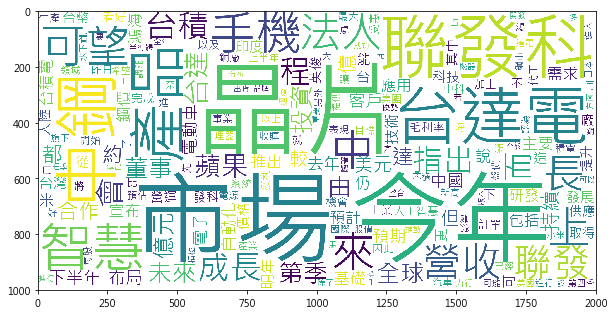

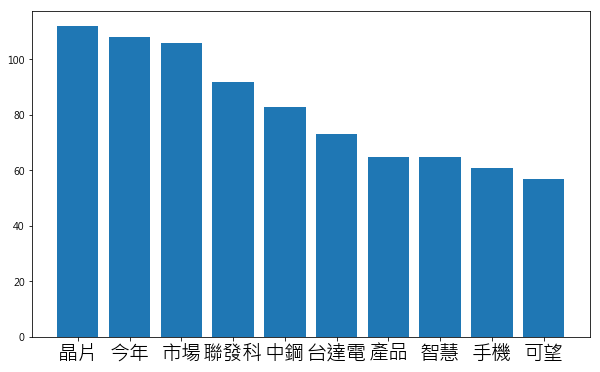

In [3]:
normal_stock()

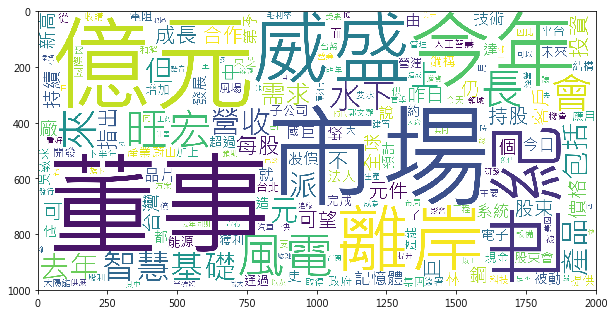

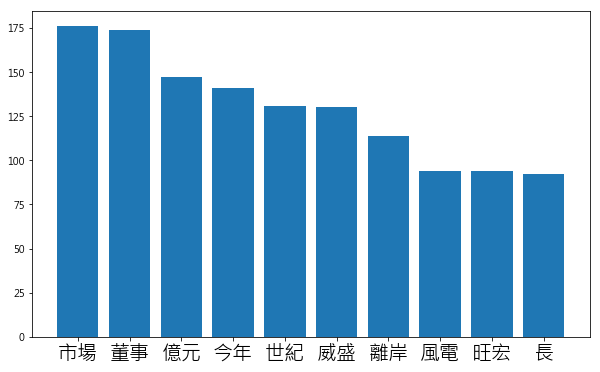

In [4]:
not_normal_stock()

### 從 jiebaWordDict.txt 加上 jieba 字典 

In [5]:
addJiebaWordDic("jiebaWordDict.txt")

###  init 四個 array 為之後的 dataframe做準備
- fileName -> 檔案名稱
- corpus -> 文章內容被結巴斷詞後的結果
- company -> 文章所屬的公司
- stockType -> 是常規股還是妖股

In [6]:
fileName = []
corpus = []
company = []
stockType = []

### 加上常規股的所有文件

In [7]:
for file in glob.glob(r'常規股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "聯發科" in name:
        company.append("聯發科")
    elif "台積電" in name:
        company.append("台積電")
    elif "台達電" in name:
        company.append("台達電")
    elif "鴻海" in name:
        company.append("鴻海")
    elif "中鋼" in name:
        company.append("中鋼")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("常規股")
    
    print(name)
    print(file_token)


20180822聯發科.txt
['一步', '三', '三足鼎立', '事業', '事業', '事業', '事業', '事業', '事業', '事業調', '今年', '今日', '今日', '以及', '個', '優化', '入', '內部', '兩項', '再度', '前台', '劃分', '力行', '加入', '半導', '半導體', '半導體', '半導體', '即', '原經', '去年', '另將', '召開', '召開', '國際', '團隊', '團隊並', '執行長', '大事', '奕力', '娛樂事業', '子公司', '子公司', '子公司', '完成', '完成', '完成', '完成', '宣布', '宣布', '家庭', '將成', '成為', '成立', '控相關', '推動', '擔任', '改組', '整案', '整除', '旗下', '旗下', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晨星', '晶片', '晶片', '智能', '智能', '會將', '會達成', '月份', '業群', '機上', '正式', '決議', '為進', '營團', '產品', '產品', '產品', '產品', '產品轉', '發科', '盒', '研發', '科代', '科分', '科技', '科技', '移至', '移轉', '積電大將', '第一', '第一次', '第三', '第二', '簡易合', '納為', '組織', '組織調', '群', '群即', '群及', '群未來', '群無線', '群經過', '群聯', '聯發', '聯發', '聯發科', '聯發科', '聯發科', '聯發科', '聯發科', '聯發科', '落實', '董事', '蔡', '訊息', '記者', '調整', '請', '這次', '通訊', '邀', '重新', '重新', '重組', '隊將', '集團', '集團', '集團資', '電視', '電視', '電視', '預計', '預計', '預計明', '體觸']
20180629聯發科.txt
['下', '下', '下', '下首', '並且', '並鎖定', '中', '中階產品', '主力', '之一', '之外', '之際', '乘

20180504台達電.txt
['一起', '三地', '三期', '三百', '上', '中', '中南', '中壢廠', '中科', '中科', '中科', '中科', '中科', '中科', '九月', '二', '二二八', '二公頃', '二千', '二年', '人機', '今年', '今年', '介面', '以外', '估計', '伺服', '依據', '億元', '億元營', '優勢', '兩地', '創造', '加碼', '勢', '十億元', '南科', '及廠', '另外', '台中', '台達', '台達', '台達', '台達', '台達電', '台達電', '台達電', '台達電', '台達電', '啟動台', '啟用', '四十', '四千七百', '四軸六軸', '園區', '土地', '地點', '大台', '宣布', '宣布', '工業', '布局', '布局', '布局', '希望', '平方公尺', '建立', '從', '感知', '房', '手臂', '打造', '投資', '投資', '投資', '投資', '投資', '投資', '投資', '控制器', '推出', '搭', '擴增', '擴大', '擴大', '擴大北', '支出', '支台', '收台', '新動能', '日前', '昨天', '昨天', '智慧', '會', '機器', '機器', '機器', '機器', '機械', '汽車', '海', '海', '減速機', '測試', '獲利', '率', '甚早', '產量', '用地', '用地', '發', '百分之八十五', '研', '研發', '研發', '研發', '研發', '科技部', '管理局', '系統', '系統', '約', '累計', '累計', '總部', '總部', '總部', '總部將', '自', '自動化', '自動化', '自動化', '自行', '至今', '舉辦', '英俊', '英俊', '董事長', '視覺', '計畫', '計畫', '記者', '設備', '超過', '趨', '軟體', '近年', '近期', '造', '造', '逾', '達', '達', '達', '達', '達', '達百億元', '選', '都', '都', '重心', '關鍵'

20180906中鋼.txt
['上半年', '上半年', '上半年', '上半年', '上半年', '上揚', '上游', '上漲', '下半年', '下半年', '下半年', '下游', '不利', '不會', '不淡', '不過', '不錯', '中', '中', '中', '中', '中國', '中鋼', '中鋼', '中鋼', '中鋼', '中鋼', '中鋼', '中鋼', '中鋼', '中鋼及', '中鴻將', '中鴻都', '主要', '了', '亦可', '今年', '今年', '今年', '今年', '仍', '仍', '以來', '以及', '以及', '供應商', '偏', '價不會', '價續揚', '元', '內銷', '內銷盤', '全年', '六季', '再度', '冬季', '出口', '創近', '加分', '勢續', '區域', '升', '反應', '受惠', '可望', '可望', '可望', '可望', '可望', '台幣', '台灣', '同時', '向上', '向上', '國家幣值', '報價', '報價', '增加', '大漲', '大跌', '大陸將', '密切', '實施', '審慎樂', '將持續', '將是', '將逾元', '展望', '市場', '平穩', '幾年', '廠商', '延續', '延長將', '強調', '影響', '影響', '影響', '恐將', '拚', '持穩', '持續', '指出', '指出', '措施', '提前', '支撐', '整盤', '整體', '整體', '旺到', '旺季', '明年', '明年', '明年', '明年', '明年', '明年', '時間', '更好', '最佳', '會平緩', '有助', '有所', '望', '本季', '條款', '樂觀', '機會', '機會連', '歐盟', '比', '水準', '法人', '淡季', '漲', '漲', '為元', '為元', '營運', '營運', '營運', '獲利', '獲利力', '產生', '盤價', '盤價', '盤價續', '相對溫', '看到', '看法', '祭出', '穩中', '空間', '第一季', '第一季', '第一季', '第一季', '第一季', '第一季', '第三季',

20180711鴻海.txt
['一代', '上', '上揚', '下將', '不', '不佳', '不過', '中國', '中國華為', '之下', '亮眼', '人力', '人力', '人力', '人民', '人民', '今年', '仍', '仍', '以及', '低價', '來', '來', '來導入', '依舊', '值得', '兌台幣', '其中', '其中', '再來', '出現', '出貨', '出貨', '出貨', '分析', '分析', '分析', '初期', '創新', '力道', '加上', '助益', '勁', '動作', '動能', '包括', '升值', '即使', '即將', '去年', '去年同期', '及第', '反而', '另外', '吋', '品牌', '品牌', '問題', '啟動', '單量', '因匯率', '因此', '基亞', '季營', '富士康', '將不會', '將達', '小米', '就', '已展', '師', '師', '師也', '帶來', '幣兌', '幣計價', '延續', '很大', '很大', '從', '成效', '成長', '成長', '手機', '招聘', '招聘', '拿下', '提升', '收逆勢', '效應', '新一波', '新機', '旺季', '是否', '是屬', '是非', '暢而鴻海', '更順', '最大', '最大', '最小', '最強', '最後為', '會', '月相', '有利於', '根據', '機並', '機種', '次之', '款新', '正面', '比', '毛利率', '法人', '波拉', '消費', '消費', '淡季', '激勵鴻海', '無', '營運', '營運', '版將', '特殊', '狀況', '獲利將', '產品', '產品', '相較', '看', '短期', '第季', '第季', '第季將', '第季表現', '策略', '組裝廠', '經營', '網路', '美元', '美元', '而', '而言', '自', '自動化', '自家', '至於', '至於', '良率', '蘋手機', '蘋果', '蘋果', '規格', '觀察', '訂', '訴求', '認為鴻海', '諾', '貨潮', '贏家', '較', '迎接',

### 加上妖股的所有文件

In [8]:
for file in glob.glob(r'妖股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "世紀鋼" in name:
        company.append("世紀鋼")
    elif "國巨" in name:
        company.append("國巨")
    elif "大同" in name:
        company.append("大同")
    elif "威盛" in name:
        company.append("威盛")
    elif "旺宏" in name:
        company.append("旺宏")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("妖股")
    
    print(name)
    print(file_token)

2018-02-02 國巨.txt
['一波國', '一致', '上', '上', '上', '上游', '上游', '下午', '不', '不利因素', '不堪', '不易', '中', '中大', '中大', '中華區', '之下', '之外', '二度', '交期', '今年', '今年', '今年', '仍', '代表', '以上', '以上', '以及', '以車', '估值', '估波', '估計', '但是', '來', '來', '供給', '個', '做', '偶業界', '傳出', '價格', '價格', '價格', '價格', '價行動', '價行動', '億億元', '億元', '內文', '全年', '全年', '兩波', '再漲', '分析', '初', '別是', '券商', '力道', '加上', '加上', '加上', '動作', '勢', '匯率', '占', '占', '厚膜', '厚膜', '受到', '可望', '可望', '可望', '台商', '台廠', '品特', '商不多', '啟動', '啟動', '因', '國巨', '國巨', '國巨將', '在外', '地區', '均', '坦言', '基板', '基板', '壓力', '多項', '大', '大型', '大型', '大陸', '大雪', '大電', '如何', '客戶', '將上', '將落', '將針', '對象', '小時', '尺寸', '尺寸', '尺寸', '工商', '工薪', '巨', '巨', '巨', '巨', '巨', '巨', '巨', '巨大', '巨年', '已有', '幅度', '廠', '廠', '廠', '廠', '廠', '廠商', '廠商', '廠廠', '影響', '影響', '從', '從產能', '心理', '持續', '指出', '指出', '挑戰元', '掃貨', '排阻', '接收', '提前', '擅長', '擴大', '擴產', '攀升', '收到', '放量', '政府', '新產能', '日系', '日起', '旺', '旺季', '昆山', '昆山', '昨日', '昨日', '時報', '時間', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片

2018-04-27 國巨2.txt
['一年', '一度', '一成', '一路上', '一輪', '上市', '上旬', '不僅', '並沒有', '今天', '今年', '今年', '今年初', '今日', '今日', '以換', '來', '保護', '保護', '停牌', '停牌', '停牌', '停牌', '停牌', '停牌', '傳', '傳出', '價為', '億元', '億元', '億元', '元', '元件', '元件', '元件', '元件', '元國', '元大關', '先前', '先點', '全', '全數', '公告', '再', '再次', '凡台', '凱美售', '出現', '利潤', '利益', '前無法', '創造', '創造', '加上', '動作', '包括', '包括', '即使', '原因', '去年', '取得', '可望', '可能', '可能', '可能', '可觀', '合意', '合意', '同一', '同屬國', '同業', '名', '名舉', '啟動', '單季', '回應', '回應國', '回檔', '因為', '固態', '國內', '國內', '國巨', '國巨', '國巨', '國巨', '國巨', '國巨今', '團成員', '團的', '在手', '大毅', '大毅', '大舉', '天線', '太陽', '奇力', '宣告', '宣布', '宣布', '將', '將於', '將於', '對象', '尤其', '尤其', '就', '巨', '巨', '巨', '巨股價', '巨集', '巨集', '市值', '市場', '市場', '市場', '市場展', '廠', '廠', '廠佳邦', '延伸', '引發', '形式', '從', '急漲', '應', '成功', '成為', '成為國', '截稿', '指出', '揣', '揣測', '擴張', '收創', '收盤', '收購', '攻', '攻克', '新高', '方式', '旗下', '日商', '日美系', '明會', '昨日', '昨日', '昨日', '時間', '晶片', '本月', '條件', '櫃', '此次', '每股', '毛利率', '法人', '海外', '測將', '漲價', '漲元', '漲多', '無法'

2018-05-28 威盛.txt
['一舉', '上', '上導入', '不僅', '中', '串', '主戰場', '主攻', '主流', '主體', '之外', '了', '了', '了', '了解', '交換', '人工智慧', '人工智慧', '人工智慧', '人工智慧', '人工智慧', '以邊', '以邊', '任務數', '企業', '企業', '企業化', '使', '使用者', '促進', '優化', '優化', '全球', '全系', '其中', '其中', '出自', '分析', '切入', '則以', '副', '創立', '功能', '加入', '加速', '動化', '即使', '即時', '可', '可靠性', '同時', '同時', '和靈', '商機', '增加', '大產品', '夯聯', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '安全', '安全', '客戶', '家庭', '實現', '將搶進', '工商', '工廠', '工廠', '工業', '工業', '工業', '工業', '工業', '工藝', '已經', '已經', '市場', '市場', '市場', '市場', '市場將', '市面上', '平', '平台', '平台', '平台', '平台', '平台', '平台', '廠', '建築', '建築', '強大', '微軟', '應用', '成各大', '我們', '所有', '手機', '手機', '手機', '技術', '把', '指出', '採集', '推出', '提供', '提高', '搭載', '搶攻', '據', '攜手', '支援', '整個', '整合', '時報', '智慧', '智慧', '智慧', '智慧型', '智慧型', '更是', '最嚴', '服務器', '架構', '核心', '格式', '機械', '機械', '機械', '活性', '流程', '消費性', '無風扇', '營運', '牆', '物聯', '物聯', '物聯', '物聯', '環境', '生態系', '生產', '生產力並', '產品', '用', '用', '由亞馬遜', '當中', '當前', '發科', '發科', '發表', '發表', '監控', 

2018-05-31 威盛.txt
['一步', '三越', '不錯', '並接', '中央', '主機板', '主要', '交通', '今天', '企業', '企業', '企業', '企業', '來', '偕', '偕', '偕', '偕', '億盼', '光廊', '其中', '凱薩飯', '去', '叫號', '叫號', '台語', '吳億盼', '吳億盼', '吳億盼', '吳億盼', '周圍', '唱', '商業化', '單', '單', '單', '單', '單吳', '單外', '國台語', '國家', '城市', '城市', '大樓', '她', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '威盛', '安全', '客戶', '嵌入式', '嵌入式', '已達', '市場', '年前', '店訂', '建置', '引擎', '引擎', '影視系', '影視系', '影音', '從過', '意味著', '成果', '戶外', '指出', '掌握', '接', '接', '播系', '播系', '擴大接', '擴大至', '擴大除', '效益', '整合', '新光', '方面', '方面', '方面', '日本', '晶片', '智慧', '智慧', '東京計', '板橋', '業', '機等', '機點', '機點', '櫃訂', '櫃點', '水準', '涵蓋', '混合', '營運', '營運', '爾', '物聯', '物聯', '物聯', '狀況', '獲', '獲連鎖', '獲錢櫃', '獲馬', '獲馬', '獲馬', '現在', '理器', '環境', '產品', '產品', '用', '看板', '硬體', '程車', '系統', '系統', '系統', '系統', '系統', '系統業績', '統訂', '統訂', '統訂', '統訂', '網', '網事業', '網兩個', '總經理', '繼獲', '能源', '自', '自家', '英特', '葡眾', '處', '處', '語音', '語音', '說', '說明', '貨車', '資訊', '賣', '賣', '起重', '跨入', '車輛', '軟體', '輝達', '轉型', '轉型'

2018-04-18 世紀鋼.txt
['三年期', '三項', '上述', '世紀', '並以', '並號', '中心', '中心', '中心', '主導', '主軸', '主辦', '之中', '了', '交流', '亦', '今年', '來訪', '供', '供', '供應', '促使', '促進', '億', '億元', '元', '內', '內', '公布', '共', '共同', '共同', '別來', '創新', '力量', '動', '包括', '包括', '協會', '參', '及營運', '召國內', '可', '可達', '台', '台', '台', '台北', '合作', '合作', '合作', '合作', '合作', '合家', '合家', '吸引', '吸引', '商來', '商機', '商與業者', '單樁', '國', '國內', '國內', '國際', '國際', '國際', '國際', '國際廠', '國際業者', '園區', '地', '域分', '培育', '基', '基礎', '基礎', '基礎', '基礎', '外業者', '多', '多年', '大聯盟', '媒合', '媒合', '學術', '家', '將攜手', '專業領', '工業', '工業', '工業局', '工程', '工程', '工程', '市場', '希望', '帶', '帶動', '廠', '廠商', '建立', '建立', '建立', '建立', '式', '形成', '應', '應國內', '成功', '成果', '成立', '我國', '我國', '手共拓', '投', '投資', '控制', '推動', '推動', '推動', '推動', '推動國', '攜', '政府', '政策', '施工', '明年', '昨日', '更', '會', '會談', '期盼', '本次', '本次', '業', '業', '業者', '業者', '業者', '機', '機構', '機產業', '機零組件', '段', '水下', '水下', '水下', '水下', '注入', '海事', '海事', '海事', '海事', '海洋', '海洋', '海洋', '海洋', '深耕', '港生產', '灣離岸', '獲得', '環境', '產值', '產業', '

2018-01-23 世紀鋼3.txt
['上', '不到', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '世紀', '並已', '中央', '乾淨', '事實', '今天', '今日', '今日', '今日', '他', '以達德', '企圖心', '位', '使用', '使用', '個', '個', '個', '個', '個', '個', '備忘錄', '優秀員工', '充分', '全國', '全國', '全國', '全球', '共同', '共有', '其一', '其中', '其二', '具有', '具有', '具有', '典禮', '典禮時', '出席', '出席', '創', '創', '去年', '及達德', '及達德', '及達德', '取得', '取得', '可', '可供', '可望', '台灣', '台灣', '台灣', '台灣', '台灣', '台灣', '台灣', '合作', '合作', '合作', '合作', '國內僅', '國際', '國際大廠', '地化', '地方', '地方', '培訓', '增加', '大', '大型', '大經濟', '子公司', '子公司', '子公司', '子公司', '家庭', '家庭', '容量', '將在', '就', '就業', '局規劃', '工廠', '工程', '市', '市', '市長', '希望', '師證照', '年產出', '廠商', '張', '強調', '性質', '性質', '意義', '應萬個', '成為', '成為', '技術', '指出', '指出', '提供', '攜手', '早已', '更', '更', '最', '最佳', '最快', '有部', '有部', '期望', '未來', '未來', '本土', '東北季', '桃園', '桃園', '桃園', '桃園', '桃園市', '案將', '業的', '業與', '構', '機會', '海峽', '海峽', '深具', '深耕', '潛力', '潛力', '焊接', '焊接', '獲得', '環保特質', '環評', '環評', '環評', '產業', '產業', '產業', '發展', '發展', '發展', '發展

2018-10-11 旺宏2.txt
['一步', '不甘示弱', '互控', '互控', '交互', '今天', '今天', '今年', '以外', '以外', '以外', '企', '依', '侵害', '侵害', '侵害', '侵害', '侵權', '侵權', '侵權', '侵權案', '先前', '入袋', '入袋', '全面', '全面', '全面', '公告', '公告', '共識', '判定', '判定', '利特', '加上', '南加州', '及其', '反控', '台灣', '台灣', '各自', '合作', '合約', '同意', '向', '向', '和解', '和解', '和解', '和解', '和解', '和解', '和解', '和解', '和解', '和解', '和解', '品', '售', '地區', '地區', '地區', '地區', '地區', '地區', '夥伴', '完成', '官司', '官司', '專', '專利', '專利', '專利', '專利', '專利', '專利後雙方', '專利戰', '專利戰', '專利權', '專利爭', '就', '就', '就', '就', '展開', '張均', '快', '懋', '指出', '授權', '控告', '控告', '提出', '提起', '擴及', '支付', '支付', '支付', '支付', '支付', '收場', '收場', '日本', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏侵', '旺宏繼', '旺宏萬', '旺宏萬', '旺宏萬', '旺宏萬', '旺宏萬', '旺宏萬', '時間', '智慧', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝', '東芝共須', '東芝須', '東芝須', '業', '權並', '正式', '法院', '法院', '法院', '爭議', '爭議', '產', '產品', '由', '確定', '確定', '簽署', '編輯', '美元', '美元', '美元', '美元', '美元', '美元', '美元', '美國', '美國', '

2017-12-01 旺宏.txt
['一環', '一篇', '上', '不', '不但', '不可或缺', '世界', '世界', '世界', '中', '中期', '中華民國', '中華民國', '之稱', '交', '亮', '人才', '今年', '今日', '仍', '他', '他', '他', '他', '他', '伏技術', '但是', '位傑', '促使', '傑出', '傑出', '傑出', '備受', '催化', '優異表現', '元件', '元件', '先', '先進', '內半導', '內外', '全球', '全球', '八', '其中', '具備', '具有', '具體', '再有', '再次', '出', '出', '出任', '前瞻', '副', '創新及', '創辦', '加入', '包括', '千禧傑', '半導', '半導', '半導體', '卓越', '博士', '博士', '即', '又', '受邀', '可行', '可靠', '可靠性', '台', '台大', '台灣', '台灣', '台灣', '台灣產學', '吋', '吳思華', '哈佛', '唯一', '商學院', '商業', '問題', '四篇', '回', '國家', '國際', '國際', '國際', '國際', '團隊', '均', '執行', '基金', '多篇', '大名', '大學', '大幅', '大會', '奧斯卡獎', '如', '學會', '學會', '學會', '學會', '學會', '學術', '學術會議', '學術界', '實力', '實踐', '將台灣', '專利', '專家且', '專注', '對國', '尖端', '尖端', '屢', '嶄新', '工研院', '工研院', '工研院', '工程', '工程', '師界', '帶領', '年代', '度', '廣泛', '引用', '得', '微米', '微米', '微米', '應用', '成功', '成為', '成立', '所長', '技', '技術', '技術', '技術', '技術', '技術', '投身', '持續', '推向', '推崇', '推廣', '推手', '提升', '揭露', '擁有', '教案', '文教', '文為', '早', '旺宏', '旺宏電子', '

2018-01-07 大同.txt
['一向', '上', '上', '上市', '上市', '上市公司', '上海', '不', '不同', '不應', '不明', '不明', '不明', '不明', '不明', '不滿', '不知', '不足', '並改選', '並獲利', '中', '中同', '中有', '中永豐', '主機關', '主管', '主管', '主管', '主管', '主管', '主要', '之合計', '之名', '之福', '之虞者', '了解', '事宜', '事業', '亟需', '人民', '人民', '什麼', '什麼', '今日', '仍', '仍', '他們', '代理人', '代表', '代表', '代表', '以維護', '任國龍', '任國龍', '任梓菱', '企圖', '企業', '但', '但', '但', '但', '但查', '何不', '何人', '何在', '來', '來', '例如', '依會', '依法', '個', '假借', '價格', '億元', '億元', '億元', '億元', '億元', '億元', '億元', '億元', '億元及', '億金額', '償', '先前', '內', '全球', '全面', '全面', '全體', '全體', '全體員工', '兩家', '兩岸', '兩岸', '公告', '公報', '公布', '公積彌補', '六福', '共', '共虧', '其中', '其中', '其應', '其攤', '再次', '出售', '出清', '出清後資金', '分別', '刊登', '別', '制法', '刻意', '刻意', '前季', '前者', '加強', '加強', '包括', '十大', '十大', '半導體', '半導體', '占', '卻', '原路', '去', '去', '去', '去', '去年', '去年', '去年', '去年', '去年', '去年', '去年', '去年', '去年', '又', '又', '及合', '反對', '反對', '受益人', '受益人', '受益人', '受益人', '受益人', '另外', '召開', '召開', '召開', '召開', '召開臨', '召開臨', '可', '可知', '台', '台並', '台灣',

2018-06-27 大同2.txt
['一度', '三段', '上下', '上任', '上任', '下', '不同', '不符', '不過', '中', '中央社', '中山北路', '中山北路', '中資', '主持', '主持', '之心', '之爭', '了', '交鋒', '今天', '今年', '今年', '今年', '代名', '估計', '但', '但', '低', '低接', '低迷', '低迷', '佳佳', '來轉', '保住', '保衛戰', '保衛戰', '修法', '價為', '億元', '億元', '億元', '億元個', '億元合', '元', '元', '光是', '內容', '全台', '全球', '全遭', '公司法', '判刑', '利為', '利益', '刪除', '前', '創始', '創立', '創立', '加上', '加計', '包括', '北台', '千億元', '千億元', '去', '去年', '參與', '取', '受到', '台北', '台北市', '台北市', '台幣', '台幣', '台幣', '各大', '因通', '團隊', '土地', '土地', '土地', '土地', '地段', '均', '增添', '增資', '外淨', '多次', '多次遭', '審查', '審查', '將替', '小股', '就', '工大', '已經', '已陸續', '市值', '市值', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '市場', '布局', '席次', '年代', '年初', '年底', '年底', '延燒', '引發', '形式', '後將', '後將', '復', '快速', '成為', '成長', '截至', '戰持續', '手冊', '投資事業', '抗議', '捍衛', '掌握', '推選林', '提及', '提名', '提案', '損為', '擔任', '擔任', '擔任', '擬以', '收支', '收為', '收盤', '改善', '改善', '改選', '改選議程', '攻防', '整體', '新能源', '新設', '方式', '日辭', '日電', '晏', '書', '曾', '會

### 把四個array加到news的dict後再把它變成news_df的dataframe

In [9]:
news = {}
news["fileName"] = fileName
news["company"] = company
news["corpus"] = corpus
news["stockType"] = stockType

In [10]:
news_df = pd.DataFrame(news)

In [11]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業 事業 事業 事業 事業 事業 事業調 今年 今日 今日 以及 個 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻...,常規股
3,20180410聯發科.txt,聯發科,上 上 下 不斷 中階處 人工智慧 低點 價位 元 內建 公布 利多消息 功能 功能 助攻 ...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中 中國 ...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 主要 事情 人才 今年 今年 今年 仍 他...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 中 以及 來 來 供 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 上 上 上 上 下 下 下半年 下半年 不 不僅 中 中 中 中 中 中 ...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 上 上 不 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 ...,常規股
9,20180111聯發科.txt,聯發科,上 中心 之後聯 事業 互動 人工智慧 人工智慧 人工智能 以天貓 來 傑 優勢 共同 具有...,常規股


## TF-IDF

### 從new_df的corpus建立tfidf矩陣

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(news_df.corpus)

In [13]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  9198


In [14]:
print("tfidf.shape: ", tfidf.shape)

tfidf.shape:  (200, 9198)


### 找出所有文件中tf-idf>0.3的字

In [15]:
### check each document
for i in range(len(corpus)):
    print('----Document {%d} %s ----'%(i+1,news_df.fileName[i]))
    for j in range(len(words)):
        if tfidf[i,j] > 0.3:
              print(words[j], tfidf[i,j], i ,j)

----Document {1} 20180822聯發科.txt ----
晨星 0.6030757710533651 0 4496
----Document {2} 20180629聯發科.txt ----
北美 0.34043139824831115 1 1596
----Document {3} 20180109聯發科.txt ----
----Document {4} 20180410聯發科.txt ----
理器 0.37083631451129234 3 5698
----Document {5} 20180426聯發科.txt ----
聯發科 0.3891089581769426 4 6802
----Document {6} 20180412聯發科.txt ----
力行 0.3575443853146718 5 1526
手機 0.30488957206770384 5 3727
----Document {7} 20171031聯發科.txt ----
----Document {8} 20180524聯發科.txt ----
聯發科 0.33985474792401893 7 6802
----Document {9} 20180228聯發科.txt ----
冠州 0.37157990460686885 8 1320
----Document {10} 20180111聯發科.txt ----
阿里巴巴 0.41393469979755076 9 8546
----Document {11} 20180129聯發科.txt ----
晶片 0.3329052163498469 10 4518
音箱 0.39386247299948063 10 8864
----Document {12} 20170208聯發科.txt ----
----Document {13} 20180302聯發科.txt ----
野村 0.3302593651557016 12 8305
----Document {14} 20180418聯發科.txt ----
----Document {15} 20180315聯發科.txt ----
----Document {16} 20180319聯發科.txt ----
----Document {17} 20171

----Document {128} 2018-02-12 威盛.txt ----
----Document {129} 2018-03-14 威盛.txt ----
威盛 0.43389304707979376 128 2726
----Document {130} 2018-06-01 威盛.txt ----
威盛 0.32388005524264823 129 2726
業務 0.34007525214580453 129 4880
----Document {131} 2018-05-31 威盛2.txt ----
助理 0.3285309871861094 130 1557
語音 0.4100184615480913 130 7387
----Document {132} 2018-05-14 威盛.txt ----
威盛 0.35427863452669417 131 2726
汽車 0.40195689119334527 131 5164
----Document {133} 2018-06-08 威盛.txt ----
語鏡 0.3598456440658764 132 7385
----Document {134} 2018-05-11 威盛.txt ----
駕駛 0.3472827399989315 133 9019
----Document {135} 2018-03-27 威盛.txt ----
宏碁 0.4319681077361539 134 2798
----Document {136} 2018-04-23 威盛.txt ----
無線 0.39018617793174765 135 5470
----Document {137} 2018-05-29 威盛.txt ----
----Document {138} 2018-02-05 威盛.txt ----
威盛 0.4024804713241884 137 2726
----Document {139} 2018-02-27 威盛.txt ----
威盛 0.32961281249297686 138 2726
----Document {140} 2018-05-31 威盛.txt ----
威盛 0.48205749540413195 139 2726
----Documen

In [16]:
words = vectorizer.get_feature_names()
print('詞語序列:', words)

詞語序列: ['一七三條', '一九三', '一事', '一些', '一代', '一件', '一份', '一休關', '一位', '一來國', '一例', '一個', '一個兆元', '一倍', '一切', '一劑', '一勝', '一半', '一口', '一台', '一同', '一向', '一問', '一塊', '一大', '一大步', '一天', '一套', '一季', '一定', '一席之地', '一年', '一度', '一座', '一廠', '一延', '一成', '一成將', '一敗', '一斑', '一方面', '一旦', '一是', '一業務', '一樣', '一次', '一款', '一步', '一段路', '一波', '一波國', '一流', '一環', '一直', '一看', '一種', '一站', '一站式', '一篇', '一系列', '一組', '一職林', '一股', '一臂之力', '一致', '一舉', '一般', '一艘', '一艘船', '一說', '一負', '一起', '一路', '一路上', '一輛', '一輪', '一週', '一邊', '一開始', '一隊', '一顆', '一體', '一體化', '一點', '七奈', '七奈米', '七年', '七成', '七美', '七股', '三件', '三個', '三倍', '三到', '三千', '三升', '三圓', '三圓圓', '三圓建設', '三地', '三大', '三大業務', '三大產品', '三季', '三家', '三年', '三年期', '三成', '三方', '三日', '三星', '三是', '三期', '三次', '三段', '三率', '三百', '三菱', '三號', '三讀', '三越', '三足鼎立', '三連漲', '三項', '上下', '上下游', '上任', '上元', '上元關', '上升', '上午', '上半年', '上台', '上周', '上周五', '上周四', '上坡路', '上季', '上將', '上導入', '上屆', '上層', '上市', '上市公司', '上揚', '上揚樂觀', '上攻', '上旬', '上會', '上月底', '上法', '上海', '上游', '上演', '上漲', '上為', '上緯', '上緯

In [17]:
tfidf_array = tfidf.toarray()

In [18]:
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05225948, 0.05225948, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
news_df

,fileName,company,corpus,stockType
0,20180822聯發科.txt,聯發科,一步 三 三足鼎立 事業 事業 事業 事業 事業 事業 事業調 今年 今日 今日 以及 個 ...,常規股
1,20180629聯發科.txt,聯發科,下 下 下 下首 並且 並鎖定 中 中階產品 主力 之一 之外 之際 乘勝 交貨 人員 人員...,常規股
2,20180109聯發科.txt,聯發科,上市 下半年 中 中階 中階 人工智慧 人臉 代表 全年 全面 功能 功能 功能 動能 反攻...,常規股
3,20180410聯發科.txt,聯發科,上 上 下 不斷 中階處 人工智慧 低點 價位 元 內建 公布 利多消息 功能 功能 助攻 ...,常規股
4,20180426聯發科.txt,聯發科,一個 一步 一顆 上 上市 上聯 下 下半年 不同 不同 不同 不同 不同 不過 中 中國 ...,常規股
5,20180412聯發科.txt,聯發科,一席之地 一樣 一流 上揚 下 不斷 不過 不錯 主要 事情 人才 今年 今年 今年 仍 他...,常規股
6,20171031聯發科.txt,聯發科,一劑 一大 中 以及 來 來 供 假設 做 傳出 其後續 其營運 具有 利基 前景 取代 取...,常規股
7,20180524聯發科.txt,聯發科,一個 一個 一步 上 上 上 上 下 下 下半年 下半年 不 不僅 中 中 中 中 中 中 ...,常規股
8,20180228聯發科.txt,聯發科,一直 一顆 上 上 不 不僅 並不 中期 中期 主戰場 也將 人工智慧 人工智慧 人工智慧 ...,常規股
9,20180111聯發科.txt,聯發科,上 中心 之後聯 事業 互動 人工智慧 人工智慧 人工智能 以天貓 來 傑 優勢 共同 具有...,常規股


## PCA

In [20]:
from sklearn.decomposition import PCA

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
news_pca = pca.fit_transform(tfidf_array)

# # Inspect the shape
print("Shape of reduced_data_pca:", news_pca.shape)
print("---")
print("PCA:")
print(news_pca)

Shape of reduced_data_pca: (200, 2)
---
PCA:
[[-3.24086700e-02  5.71251785e-02]
 [-9.99854803e-02  1.01579575e-01]
 [-1.14578826e-01  7.08576067e-02]
 [-9.71295403e-02  3.80468673e-02]
 [-8.53276565e-02  1.97005475e-01]
 [-1.15090819e-01  6.00809626e-02]
 [-5.74091906e-02  4.58835025e-02]
 [-1.47056660e-01  1.22143783e-01]
 [-1.10251742e-01  1.88114433e-01]
 [-6.70262011e-02  2.46343027e-01]
 [-1.01845689e-01  1.74227897e-01]
 [-7.36879083e-02  1.03085607e-01]
 [-9.96935217e-02  9.22786211e-02]
 [-1.26302540e-01 -5.05322163e-02]
 [-8.41143848e-02  1.65975470e-01]
 [-1.30055347e-01  7.46881515e-02]
 [-8.41506515e-02  1.22814504e-01]
 [-1.10121834e-01  4.16655639e-02]
 [-1.11496685e-01 -4.40936658e-02]
 [-8.57266817e-02  1.22935821e-01]
 [-4.47380946e-02  8.83467866e-02]
 [-2.75102227e-02  3.11408673e-02]
 [-8.15986528e-02 -5.52946037e-02]
 [-2.08684582e-03  2.41115057e-02]
 [-1.01620153e-01 -1.48903170e-01]
 [-7.42797371e-03 -4.01721097e-03]
 [-3.93284980e-02  4.47003380e-03]
 [-2.79594

### 畫出常規股和妖股在降維後的PCA的圖

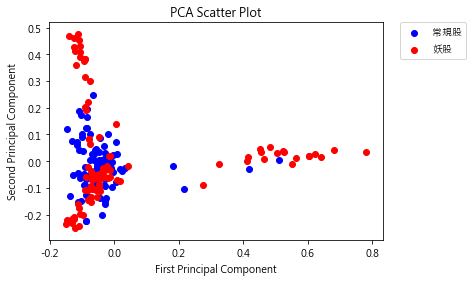

In [21]:
colors = ['blue', 'red']
stockType = ["常規股", "妖股"]
for i in range(len(colors)):
    x = news_pca[:, 0][news_df.stockType == stockType[i]]
    y = news_pca[:, 1][news_df.stockType == stockType[i]]
    plt.scatter(x, y, c=colors[i])
plt.legend(stockType , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

### 畫出公司在降維後的PCA的圖

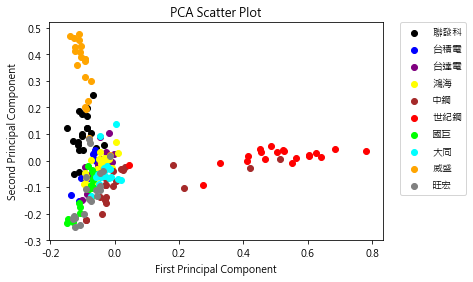

In [22]:
colors = ['black', 'blue', 'purple', 'yellow', 'brown', 'red', 'lime', 'cyan', 'orange', 'gray']
companys = ["聯發科", "台積電", "台達電", "鴻海", "中鋼", "世紀鋼", "國巨", "大同", "威盛", "旺宏"]
for i in range(len(colors)):
    x = news_pca[:, 0][news_df.company == companys[i]]
    y = news_pca[:, 1][news_df.company == companys[i]]
    plt.scatter(x, y, c=colors[i])
plt.legend(companys , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

## 利用tfidf作為訓練資料，實作K-Means與SVM分類 常規股和妖股

In [23]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(tfidf_array, news_df.stockType, test_size=0.25, random_state=42)

In [24]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

print(n_digits)

# Inspect `y_train`
print(len(y_train))

150
9198
2
150


In [25]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y_train

114     妖股
173     妖股
5      常規股
126     妖股
117     妖股
73     常規股
140     妖股
98     常規股
172     妖股
96     常規股
169     妖股
97     常規股
31     常規股
12     常規股
35     常規股
119     妖股
42     常規股
189     妖股
90     常規股
136     妖股
51     常規股
127     妖股
162     妖股
41     常規股
118     妖股
113     妖股
26     常規股
139     妖股
100     妖股
111     妖股
      ... 
48     常規股
88     常規股
21     常規股
57     常規股
160     妖股
192     妖股
129     妖股
37     常規股
157     妖股
193     妖股
1      常規股
52     常規股
149     妖股
130     妖股
151     妖股
103     妖股
99     常規股
116     妖股
87     常規股
74     常規股
121     妖股
199     妖股
20     常規股
188     妖股
71     常規股
106     妖股
14     常規股
92     常規股
179     妖股
102     妖股
Name: stockType, Length: 150, dtype: object

In [28]:
y_test

95     常規股
15     常規股
30     常規股
158     妖股
128     妖股
115     妖股
69     常規股
170     妖股
174     妖股
45     常規股
66     常規股
182     妖股
165     妖股
78     常規股
186     妖股
177     妖股
56     常規股
152     妖股
82     常規股
68     常規股
124     妖股
16     常規股
148     妖股
93     常規股
65     常規股
60     常規股
84     常規股
67     常規股
125     妖股
132     妖股
9      常規股
18     常規股
55     常規股
75     常規股
150     妖股
104     妖股
135     妖股
137     妖股
164     妖股
76     常規股
79     常規股
197     妖股
38     常規股
24     常規股
122     妖股
195     妖股
29     常規股
19     常規股
143     妖股
86     常規股
Name: stockType, dtype: object

### K-Means 分類 常規股和妖股

In [29]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=2, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [30]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)

# Study the shape of the cluster centers
clf.cluster_centers_.shape

predict 結果
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]
---實際上---
變為01
[1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 1]
正確
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']


(2, 9198)

In [31]:
print(clf.cluster_centers_)

[[ 4.28356427e-04  4.28356427e-04  0.00000000e+00 ...  5.35083937e-04
   4.97788095e-04 -1.95156391e-18]
 [-1.08420217e-19 -1.08420217e-19  0.00000000e+00 ... -5.42101086e-20
   2.71050543e-19  3.54474307e-03]]


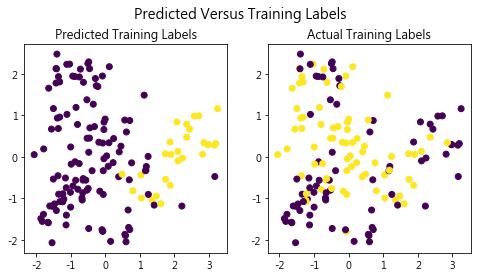

In [32]:
# 載入 `Isomap()`
from sklearn.manifold import Isomap

# 使用 Isomap 對 `X_train` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

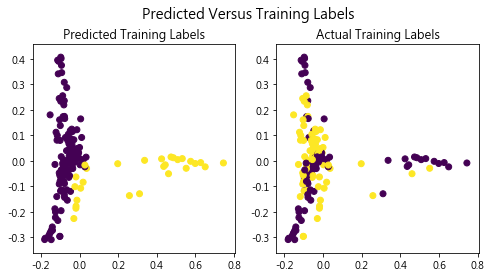

In [33]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

# 使用 PCA 對 `X_train` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [34]:
# Import `metrics` from `sklearn`
from sklearn import metrics

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)


# Print out the confusion matrix with `confusion_matrix()`
print("\n正確與錯誤的metrics")
print(metrics.confusion_matrix(pd.Categorical(y_test).codes, y_pred))

predict 結果
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]
---實際上---
變為01
[1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 1 0 1]
正確
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']

正確與錯誤的metrics
[[18  5]
 [27  0]]


### SVM 分類 常規股和妖股

In [35]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train).score(X_test, y_test)

1.0

In [36]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test.values)

['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']
['常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '妖股'
 '常規股' '妖股' '妖股' '常規股' '妖股' '常規股' '常規股' '妖股' '常規股' '妖股' '常規股' '常規股' '常規股'
 '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '常規股' '常規股' '妖股' '妖股' '妖股' '妖股' '妖股'
 '常規股' '常規股' '妖股' '常規股' '常規股' '妖股' '妖股' '常規股' '常規股' '妖股' '常規股']


In [37]:
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

          妖股       1.00      1.00      1.00        23
         常規股       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[23  0]
 [ 0 27]]


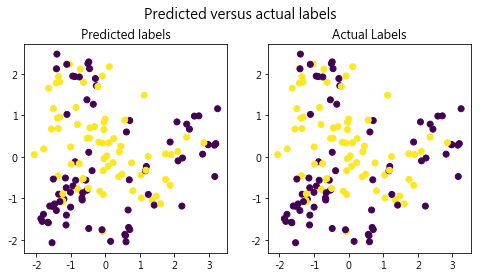

In [38]:
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

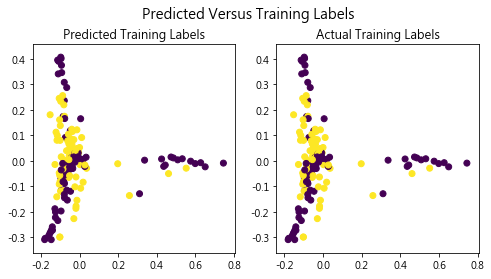

In [39]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

## 利用tfidf作為訓練資料，實作K-Means與SVM分類 公司

In [40]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(tfidf_array, news_df.company, test_size=0.25, random_state=42)

In [41]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

print(n_digits)

# Inspect `y_train`
print(len(y_train))

150
9198
10
150


In [42]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
y_train

114     國巨
173     旺宏
5      聯發科
126     威盛
117     國巨
73     台積電
140    世紀鋼
98      鴻海
172     旺宏
96      鴻海
169     旺宏
97      鴻海
31     台達電
12     聯發科
35     台達電
119     國巨
42      中鋼
189     大同
90      鴻海
136     威盛
51      中鋼
127     威盛
162     旺宏
41      中鋼
118     國巨
113     國巨
26     台達電
139     威盛
100     國巨
111     國巨
      ... 
48      中鋼
88      鴻海
21     台達電
57      中鋼
160     旺宏
192     大同
129     威盛
37     台達電
157    世紀鋼
193     大同
1      聯發科
52      中鋼
149    世紀鋼
130     威盛
151    世紀鋼
103     國巨
99      鴻海
116     國巨
87      鴻海
74     台積電
121     威盛
199     大同
20     台達電
188     大同
71     台積電
106     國巨
14     聯發科
92      鴻海
179     旺宏
102     國巨
Name: company, Length: 150, dtype: object

In [45]:
y_test

95      鴻海
15     聯發科
30     台達電
158    世紀鋼
128     威盛
115     國巨
69     台積電
170     旺宏
174     旺宏
45      中鋼
66     台積電
182     大同
165     旺宏
78     台積電
186     大同
177     旺宏
56      中鋼
152    世紀鋼
82      鴻海
68     台積電
124     威盛
16     聯發科
148    世紀鋼
93      鴻海
65     台積電
60     台積電
84      鴻海
67     台積電
125     威盛
132     威盛
9      聯發科
18     聯發科
55      中鋼
75     台積電
150    世紀鋼
104     國巨
135     威盛
137     威盛
164     旺宏
76     台積電
79     台積電
197     大同
38     台達電
24     台達電
122     威盛
195     大同
29     台達電
19     聯發科
143    世紀鋼
86      鴻海
Name: company, dtype: object

### K-Means 分類 公司

In [46]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [47]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)

# Study the shape of the cluster centers
clf.cluster_centers_.shape

predict 結果
[6 6 2 7 5 4 6 8 8 1 6 4 8 6 4 8 1 7 6 6 5 6 7 6 6 6 6 6 5 5 6 6 1 6 7 3 5
 5 8 6 6 4 2 2 5 4 2 6 7 6]
---實際上---
變為01
[9 8 3 0 6 4 2 7 7 1 2 5 7 2 5 7 1 0 9 2 6 8 0 9 2 2 9 2 6 6 8 8 1 2 0 4 6
 6 7 2 2 5 3 3 6 5 3 8 0 9]
正確
['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台積電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '威盛' '聯發科' '世紀鋼' '鴻海' '台積電' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']


(10, 9198)

In [48]:
print(clf.cluster_centers_)

[[ 5.42101086e-20  5.42101086e-20  0.00000000e+00 ... -5.42101086e-20
   0.00000000e+00  0.00000000e+00]
 [ 5.42101086e-20  5.42101086e-20  0.00000000e+00 ... -5.42101086e-20
   1.08420217e-19  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.84001414e-03
   1.62630326e-19  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.42101086e-20
   1.62630326e-19  6.20330037e-03]
 [-5.42101086e-20 -5.42101086e-20  0.00000000e+00 ...  0.00000000e+00
   1.62630326e-19  0.00000000e+00]
 [ 5.42101086e-20  5.42101086e-20  0.00000000e+00 ... -5.42101086e-20
   0.00000000e+00  0.00000000e+00]]


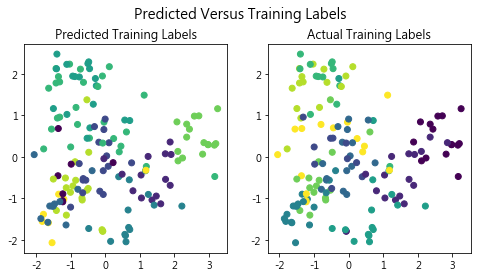

In [49]:
# 載入 `Isomap()`
from sklearn.manifold import Isomap

# 使用 Isomap 對 `X_train` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

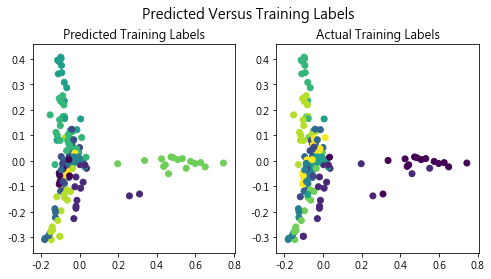

In [50]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

# 使用 PCA 對 `X_train` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [51]:
# Import `metrics` from `sklearn`
from sklearn import metrics

print("predict 結果")
print(y_pred)
print("---實際上---")
print("變為01")
print(pd.Categorical(y_test).codes)
print("正確")
print(y_test.values)


# Print out the confusion matrix with `confusion_matrix()`
print("\n正確與錯誤的metrics")
print(metrics.confusion_matrix(pd.Categorical(y_test).codes, y_pred))

predict 結果
[6 6 2 7 5 4 6 8 8 1 6 4 8 6 4 8 1 7 6 6 5 6 7 6 6 6 6 6 5 5 6 6 1 6 7 3 5
 5 8 6 6 4 2 2 5 4 2 6 7 6]
---實際上---
變為01
[9 8 3 0 6 4 2 7 7 1 2 5 7 2 5 7 1 0 9 2 6 8 0 9 2 2 9 2 6 6 8 8 1 2 0 4 6
 6 7 2 2 5 3 3 6 5 3 8 0 9]
正確
['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台積電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '威盛' '聯發科' '世紀鋼' '鴻海' '台積電' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']

正確與錯誤的metrics
[[ 0  0  0  0  0  0  0  5  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0]]


### SVM 分類 公司

In [52]:
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train).score(X_test, y_test)

0.92

In [53]:
# Predict the label of `X_test`
print(svc_model.predict(X_test))

# Print `y_test` to check the results
print(y_test.values)

['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '大同' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台達電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '鴻海' '聯發科' '世紀鋼' '鴻海' '鴻海' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']
['鴻海' '聯發科' '台達電' '世紀鋼' '威盛' '國巨' '台積電' '旺宏' '旺宏' '中鋼' '台積電' '大同' '旺宏'
 '台積電' '大同' '旺宏' '中鋼' '世紀鋼' '鴻海' '台積電' '威盛' '聯發科' '世紀鋼' '鴻海' '台積電' '台積電'
 '鴻海' '台積電' '威盛' '威盛' '聯發科' '聯發科' '中鋼' '台積電' '世紀鋼' '國巨' '威盛' '威盛' '旺宏'
 '台積電' '台積電' '大同' '台達電' '台達電' '威盛' '大同' '台達電' '聯發科' '世紀鋼' '鴻海']


In [54]:
# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

         世紀鋼       1.00      1.00      1.00         5
          中鋼       1.00      1.00      1.00         3
         台積電       1.00      0.80      0.89        10
         台達電       0.80      1.00      0.89         4
          國巨       1.00      0.50      0.67         2
          大同       0.80      1.00      0.89         4
          威盛       1.00      0.86      0.92         7
          旺宏       1.00      1.00      1.00         5
         聯發科       1.00      1.00      1.00         5
          鴻海       0.71      1.00      0.83         5

   micro avg       0.92      0.92      0.92        50
   macro avg       0.93      0.92      0.91        50
weighted avg       0.94      0.92      0.92        50

[[5 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 8 1 0 0 0 0 0 1]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 1]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


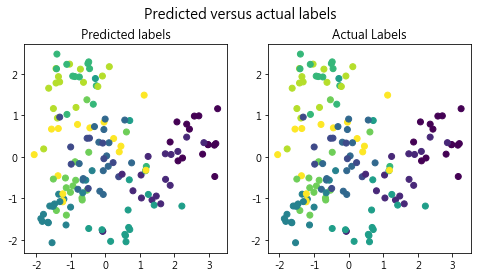

In [55]:
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

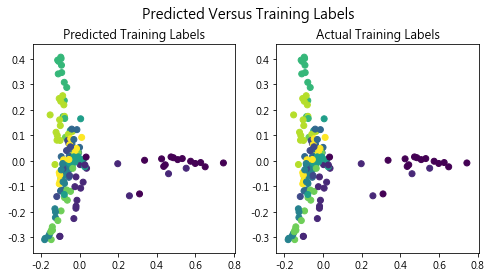

In [56]:
# 載入 `PCA()`
from sklearn.decomposition import PCA

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 對 `digits` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(predicted).codes)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y_train).codes)
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()